# **<span style="color: #FF5733;">Data Visualization</span>**
<span style="color: #FF5733;">Daniel Camacho</span><br>
<span style="color: #FF5733;">dacamachoh1@gmail.com</span><br><br><br>

Unos ejercicios de visualización de datos siguiendo los consejos en el libro: 
-   *Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures* 

<img src="data_viz_book.png" alt="Descripción de la imagen" style="width: 400px;">


Setup:

In [7]:
# Requerimientos: 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import plotly.io as pio
from IPython.display import Image
from utils import (
    import_kaggle_data)

# Ignorar todos los warnings
warnings.filterwarnings('ignore')

Leer data de Kaggle:

In [5]:
kaggle_json_path    = './kaggle.json'
dataset_path        = 'girumwondemagegn/dataset-for-renewable-energy-systems'

# Get data 
df = import_kaggle_data(kaggle_json_path=kaggle_json_path, dataset_path=dataset_path)
print('Dimensiones del dataframe:', df.shape)

Dataset URL: https://www.kaggle.com/datasets/girumwondemagegn/dataset-for-renewable-energy-systems
Datos descargados con éxito por medio de la API de Kaggle
Dimensiones del dataframe: (15000, 13)


Por ejemplo, esta gráfica tiene un error (proviene de esta [notebook](https://www.kaggle.com/code/edmund24/eda-of-renewable-energy-systems)): 


>>> Wrong:


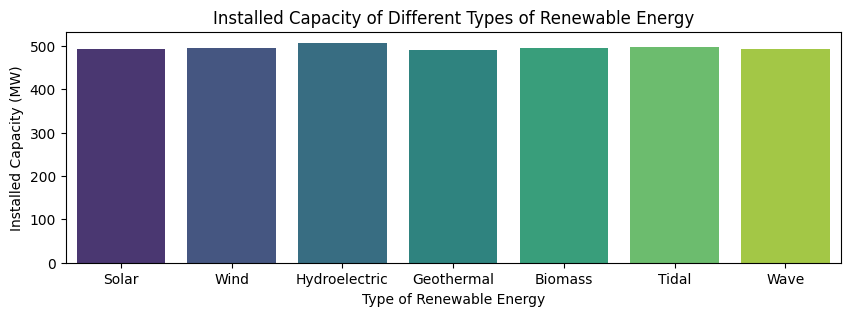

In [14]:
plt.figure(figsize=(10, 3))
sns.barplot(x='Type_of_Renewable_Energy', y='Installed_Capacity_MW', data=df, ci=None, palette='viridis')
plt.title('Installed Capacity of Different Types of Renewable Energy')
plt.xlabel('Type of Renewable Energy')
plt.ylabel('Installed Capacity (MW)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Solar', 'Wind', 'Hydroelectric', 'Geothermal', 'Biomass', 'Tidal', 'Wave'])
print('\n>>> Wrong:')
plt.show()

Errores de esa gráfica: 
-   No se sabe cuál tiene más MW
-   ni cuánta es la diferencia
-   Ni se sabe si es la media, mediana o que en el eje y
-   No se necesitan ticks en eje y 

Corrección, usando plotly:


>>> Good:


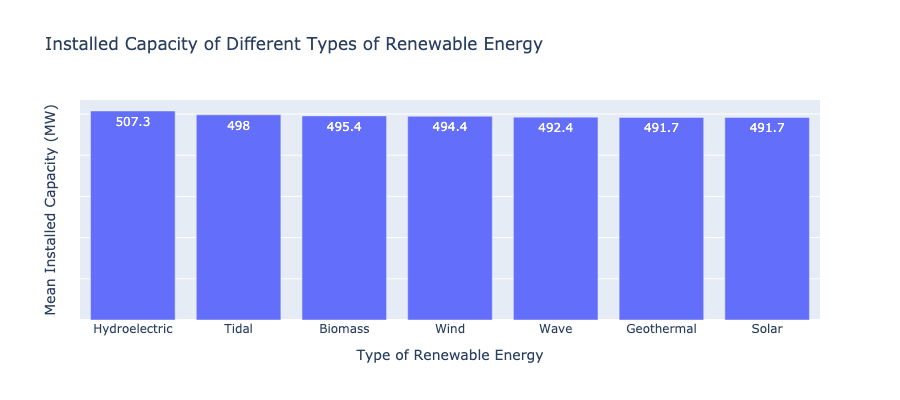

In [12]:
# Crear variable de eje
energy_map = {
    1: 'Solar',
    2: 'Wind',
    3: 'Hydroelectric',
    4: 'Geothermal',
    5: 'Biomass',
    6: 'Tidal',
    7: 'Wave'
}

# Crear la columna 'Type_of_Renewable_Energy_label'
df['Type_of_Renewable_Energy_label'] = df['Type_of_Renewable_Energy'].map(energy_map)

# Agrupar a la media
tab = df.groupby('Type_of_Renewable_Energy_label').agg(
    Installed_Capacity_MW = ('Installed_Capacity_MW', 'mean')).reset_index()

# Redondear para verla más limpia
tab['Installed_Capacity_MW'] = tab['Installed_Capacity_MW'].round(1)
tab = tab.sort_values('Installed_Capacity_MW', ascending=False)

# Plot
fig = px.bar(tab, 
             x='Type_of_Renewable_Energy_label', 
             y='Installed_Capacity_MW',
             title='Installed Capacity of Different Types of Renewable Energy',
             labels={'Type_of_Renewable_Energy_label': 'Type of Renewable Energy', 
                     'Installed_Capacity_MW': 'Mean Installed Capacity (MW)'},
             text='Installed_Capacity_MW')
fig.update_yaxes(showticklabels=False, 
                 title_standoff=20)
# Guardar la imagen como PNG
pio.write_image(fig, 'plots/plot1.png', width=900, height=400)

# Mostrar la imagen guardada
print('\n>>> Good:')
Image('plots/plot1.png')